# Objetivo 1

## Índice de la práctica

- [1.Introducción](#1.Introducción)
- [2.Creación de datos](#2.Creación-de-datos)
- [3.Regresión logística](#3.Regresión-logística)
- [4.SVM](#4.SVM)

In [64]:
import cv2
import glob
import skimage


#Librerias contornos 
import numpy as np
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
from skimage import data, io
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.filters import threshold_otsu 
from skimage.feature import hog
from skimage import data, exposure

#Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris #dataset de prueba
from sklearn.preprocessing import OneHotEncoder
from scipy.optimize import minimize
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn import svm

#para datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor


# 1.Introducción

Para cumplir el objetivo 1, se han llevado a cabo las siguientes tareas

# 2.Creación de datos

Se va a crear la matriz X, que es la que contiene las imágenes (se crea un dataset).

$devolverDiccionarioEtiquetas$

In [2]:
# HOG
def hogMaker(images00000_mod):
    fd, hog_image = hog(images00000_mod, orientations=8, pixels_per_cell=(16, 16),
                        cells_per_block=(1, 1), visualize=True)

#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

#     ax1.axis('off')
#     ax1.imshow(images00000_mod, cmap=plt.cm.gray)
#     ax1.set_title('Input image')

#     # Rescale histogram for better display
#     hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

#     ax2.axis('off')
    #ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    #ax2.set_title('Histogram of Oriented Gradients')
    #plt.show()
    return fd


# $Sift$
#devuelve descriptor de Sift
def siftMaker(images00000_mod):
    sift = cv2.xfeatures2d.SIFT_create()
    kp, des = sift.detectAndCompute(images00000_mod,None)    
    #quizas falta un tercer parametro:  imagen original
    img=cv2.drawKeypoints(images00000_mod,kp, images00000_mod, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    #cv2.imwrite('sift_keypoints.jpg',img)
    return des


# $Surf$
def surfmaker(images00000_mod):
    surf = cv2.xfeatures2d.SURF_create(400)
    kp, des = surf.detectAndCompute(images00000_mod,None)
    return des

# $Fast$ + $Brief$
def fastbrief_Maker(images00000_mod):
    fast = cv2.FastFeatureDetector_create()

    # find and draw the keypoints
    kp2 = fast.detect(images00000_mod,None)
    img2 = cv2.drawKeypoints(images00000_mod, kp2, None, color=(255,0,0))

    # Disable nonmaxSuppression
    fast.setNonmaxSuppression(0)
    kp3 = fast.detect(img2,None)

    img3 = cv2.drawKeypoints(img2, kp3, None, color=(255,0,0))
    brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

    # Compute descriptors
    kp, des = brief.compute(img3, kp3) #fast nonsup
    return des


# $ORB$
def orbMaker(images00000_mod):
    # Initiate ORB detector
    orb = cv2.ORB_create()

    # find the keypoints with ORB
    kp = orb.detect(images00000_mod,None)

    # compute the descriptors with ORB
    kp, des = orb.compute(images00000_mod, kp)

    # draw only keypoints location,not size and orientation
#     img2 = cv2.drawKeypoints(images00000_mod, kp, None, color=(0,255,0), flags=0)
    #plt.imshow(img2), plt.show()
    return des

In [3]:
'''
Descripcion: diccionario con los posibles valores de las imagenes, en relacion con el nombre de las carpetas.
Entrada: -
Salida: diccionario cuyas claves son el nombre de las carpetas, y los valores son el tipo de signals que contiene.
'''


def devolverDiccionarioEtiquetas():
    
    diccionarioValores = {}
    diccionarioValores['00000'] = 'VelocidadMaxima20'
    diccionarioValores['00001'] = 'VelocidadMaxima30'
    diccionarioValores['00002'] = 'VelocidadMaxima50'
    diccionarioValores['00003'] = 'VelocidadMaxima60'
    diccionarioValores['00004'] = 'VelocidadMaxima70'
    diccionarioValores['00005'] = 'VelocidadMaxima80'
    diccionarioValores['00006'] = 'FinVelocidadMaxima80'
    diccionarioValores['00007'] = 'VelocidadMaxima100'
    diccionarioValores['00008'] = 'VelocidadMaxima120'
    diccionarioValores['00009'] = 'AdelantamientoProhibido'
    diccionarioValores['00010'] = 'AdelantamientoProhibidoParaCamiones'

    diccionarioValores['00011'] = 'InterseccionConPrioridad'
    diccionarioValores['00012'] = 'CalzadaConPrioridad'
    diccionarioValores['00013'] = 'CedaElPaso'
    diccionarioValores['00014'] = 'DetencionObligatoria'
    diccionarioValores['00015'] = 'CirculacionProhibida'
    diccionarioValores['00016'] = 'EntradaProhibidaAVehiculosMercancias'
    diccionarioValores['00017'] = 'EntradaProhibida'
    diccionarioValores['00018'] = 'OtrosPeligros'
    diccionarioValores['00019'] = 'CurvaPeligrosaHaciaLaIzquierda'
    diccionarioValores['00020'] = 'CurvaPeligrosaHaciaLaDerecha'

    diccionarioValores['00021'] = 'CurvasPeligrosasHaciaLaIzquierda'
    diccionarioValores['00022'] = 'PerfilIrregular'
    diccionarioValores['00023'] = 'PavimentoDeslizante'
    diccionarioValores['00024'] = 'EstrechamientoCalzadaPorDerecha'
    diccionarioValores['00025'] = 'Obras'
    diccionarioValores['00026'] = 'Semaforos'
    diccionarioValores['00027'] = 'PasoDePeatones'
    diccionarioValores['00028'] = 'Kids'
    diccionarioValores['00029'] = 'EntradaProhibidasCiclos'
    diccionarioValores['00030'] = 'PavimentoDeslizanteNieveHielo'

    diccionarioValores['00031'] = 'PasoDeAnimalesEnLibertad'
    diccionarioValores['00032'] = 'FinDeProhibiciones'
    diccionarioValores['00033'] = 'SentidoObligatorioDerecha'
    diccionarioValores['00034'] = 'SentidoObligatorioIzquierda'
    diccionarioValores['00035'] = 'SentidoObligatorio'
    diccionarioValores['00036'] = 'DirPermitidasRectoYDerecha'
    diccionarioValores['00037'] = 'DirPermitidasRectoEIzquierda'
    diccionarioValores['00038'] = 'PasoObligatorioDerecha'
    diccionarioValores['00039'] = 'PasoObligatorioizquierda'
    diccionarioValores['00040'] = 'InterseccionSentidoObligatorioGiratorio'


    diccionarioValores['00041'] = 'FinProhibicionAdelantamiento'
    diccionarioValores['00042'] = 'FinProhibicionAdelantamientoCamiones'
    
    return diccionarioValores

Probemos ahora el código....

In [4]:
d =  devolverDiccionarioEtiquetas()

for k,v in d.items():
    print(v)

VelocidadMaxima20
VelocidadMaxima30
VelocidadMaxima50
VelocidadMaxima60
VelocidadMaxima70
VelocidadMaxima80
FinVelocidadMaxima80
VelocidadMaxima100
VelocidadMaxima120
AdelantamientoProhibido
AdelantamientoProhibidoParaCamiones
InterseccionConPrioridad
CalzadaConPrioridad
CedaElPaso
DetencionObligatoria
CirculacionProhibida
EntradaProhibidaAVehiculosMercancias
EntradaProhibida
OtrosPeligros
CurvaPeligrosaHaciaLaIzquierda
CurvaPeligrosaHaciaLaDerecha
CurvasPeligrosasHaciaLaIzquierda
PerfilIrregular
PavimentoDeslizante
EstrechamientoCalzadaPorDerecha
Obras
Semaforos
PasoDePeatones
Kids
EntradaProhibidasCiclos
PavimentoDeslizanteNieveHielo
PasoDeAnimalesEnLibertad
FinDeProhibiciones
SentidoObligatorioDerecha
SentidoObligatorioIzquierda
SentidoObligatorio
DirPermitidasRectoYDerecha
DirPermitidasRectoEIzquierda
PasoObligatorioDerecha
PasoObligatorioizquierda
InterseccionSentidoObligatorioGiratorio
FinProhibicionAdelantamiento
FinProhibicionAdelantamientoCamiones


# MODIFICAR!!!!!!

In [5]:
def crearDiccionarioDatos():
    trafic_signals = {}
    #para cada tipo de señal creamos una lista con sus ejemplos, y se la asignamos a su etiqueta de nombre de carpeta
    for i in range(0,43):
        if i<10:
            folder = 'Dataset_traffic_sign/0000'+str(i)+'/*.png'
            tipo = '0000'+str(i)
        else:
            folder = 'Dataset_traffic_sign/000'+str(i)+'/*.png'
            tipo = '000'+str(i)
        
        images = [cv2.imread(file,0) for file in glob.glob(folder)]
        images_mod = [] 
        for im in images:
            #se aplica el resize
            images_mod.append(cv2.resize(im, (100, 100), interpolation = cv2.INTER_NEAREST))

        trafic_signals[tipo] = images_mod
    return trafic_signals

# Creamos nuestra matriz de datos
def creaMatrizCaracteristicas(trafic_signals, signals_types, carac_type):
    Xtrain = 0
    Ytrain = 0
    Xtest = 0
    Ytest = 0
    
    for signal,images in trafic_signals.items():
        x = []
        y = []
        
        x = obtenerDesCaracteristicas(np.array(images), carac_type)
        
        for i in range(x.shape[0]):
            y.append(signals_types[signal])
            
        y = np.array(y).reshape(-1,1)
        
        xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size=0.4, stratify=y,random_state=1)
        
        if signal=='00000':
            Xtrain = xtrain
            Ytrain = ytrain
            Xtest = xtest
            Ytest = ytest
        else:
            Xtrain = np.vstack((Xtrain,xtrain))
            Ytrain =  np.vstack((Ytrain,ytrain))
            Xtest = np.vstack((Xtest,xtest))
            Ytest = np.vstack((Ytest,ytest))
    
    return Xtrain,Ytrain,Xtest,Ytest

# Pasamos una np array de imagenes y vamos sacando sus descriptores 1 a 1
def obtenerDesCaracteristicas(images_o, carac_type):
    des = None
    
    for i in range(images_o.shape[0]):
        if carac_type=='sift':
            d = siftMaker(images_o[i])
        elif carac_type=='surf':
            d = surfmaker(images_o[i])
        elif carac_type=='fast_brief':
            d = fastbrief_Maker(images_o[i])
        elif carac_type=='orb':
            d = orbMaker(images_o[i])
        elif carac_type=='hog':
            d = hogMaker(images_o[i])
        else:
            try:
                raise ValueError
            except ValueError:
                print("valor incorrecto")
                
        if d is not None:
            if des is None:
                des = d
            else:
                des = np.vstack((des,d))
    return des

NUEVO: cogemos las imagenes y las separamoms en train y test, y decimos a que clase pertenecen

In [6]:
def separaTrainTest(trafic_signals,signals_types):
    imagenesTrain = None
    imagenesTest = None
    ytrain = None
    ytest = None
    
    for signal,images in trafic_signals.items():
        
        aux_y_train = []
        aux_y_test = []
        
        np_im = np.array(images)
        n_train = int(0.6*np_im.shape[0])
        n_test = np_im.shape[0]-n_train
        
        aux_train = np_im[:n_train]
        aux_test = np_im[n_train:]
        
        for i in range(n_train):
            aux_y_train.append(signals_types[signal])
        for i in range(n_test):
            aux_y_test.append(signals_types[signal])
        
        aux_y_train = np.array(aux_y_train).reshape(-1,1)
        aux_y_test = np.array(aux_y_test).reshape(-1,1)
        
        if imagenesTrain is None:
            imagenesTrain = aux_train
            ytrain = aux_y_train
            imagenesTest = aux_test
            ytest = aux_y_test
        else:
            imagenesTrain = np.concatenate((imagenesTrain,aux_train),axis=0)
            ytrain =  np.vstack((ytrain,aux_y_train))
            imagenesTest = np.concatenate((imagenesTest,aux_test),axis=0)
            ytest = np.vstack((ytest,aux_y_test))
        
    return imagenesTrain,imagenesTest,ytrain,ytest

NUEVO: creamos las caracteristicas con los datos que nos den y sus tipos

In [44]:
def creaMatrizCaracteristicas(imagenes,carac_type, y=None ):
    X = None
    if y is not None:
        y_nueva = []
        
    for i in range(imagenes.shape[0]):
        if carac_type=='sift':
            d = siftMaker(imagenes[i])
        elif carac_type=='surf':
            d = surfmaker(imagenes[i])
        elif carac_type=='fast_brief':
            d = fastbrief_Maker(imagenes[i])
        elif carac_type=='orb':
            d = orbMaker(imagenes[i])
        elif carac_type=='hog':
            d = hogMaker(imagenes[i])
        else:
            try:
                raise ValueError
            except ValueError:
                print("valor incorrecto")
        
        if d is not None:
#             print(d.shape)
            if y is not None:
                if y[i] == 'FinDeProhibiciones':
                    print(y[i])
                y_nueva.append(y[i])
            if X is None:
                X = d
            else:
                X = np.vstack((X,d))
    if y is not None:
        return X, np.array(y_nueva)
    else:
        return X

In [47]:
trafic_signals = crearDiccionarioDatos()
signals_types = devolverDiccionarioEtiquetas()
carac_type = 'hog'

In [9]:
# Xtrain,Ytrain,Xtest,Ytest = creaMatrizCaracteristicas(trafic_signals, signals_types, carac_type)

In [10]:
# Xtrain.shape, Ytrain.shape, Xtest.shape, Ytest.shape

In [48]:
imagenesTrain,imagenesTest,ytrain,ytest = separaTrainTest(trafic_signals,signals_types)
Xtrain, Ytrain = creaMatrizCaracteristicas(imagenesTrain,carac_type,ytrain)

['FinDeProhibiciones']
['FinDeProhibiciones']
['FinDeProhibiciones']
['FinDeProhibiciones']


In [12]:
imagenesTrain.shape,imagenesTest.shape,ytrain.shape,ytest.shape

((739, 100, 100), (525, 100, 100), (739, 1), (525, 1))

In [13]:
Xtrain.shape, Ytrain.shape

((739, 288), (739, 1))

# Aplicación de Machine Learning

A continuación se implementarán dos modelos de ML como son regresión logísitica y redes neuronales para dar solución al problema.

# 3.Regresión logística

Si 𝑛 es grande (relativo a m), siendo n el número de características y m el número de ejemplos se recomienda usar regresión logística. Como este no es el caso, el resultado que se obtendrá no será el óptimo. Tal como se mostrará a continuación...

In [49]:
def transformarY(y, signal):
    aux = np.copy(y)
    Y = np.zeros(y.shape[0]).reshape(-1,1)
    
    Y[aux != np.array([signal])] = 0
    Y[aux == np.array([signal])] = 1
    
    return Y.reshape(-1)

In [15]:
np.any(Ytrain == 'FinDeProhibiciones')

True

In [74]:
predicctionsTrain = []
predicctionsTest = []
final_signals = []

for k,s in signals_types.items():
    Ytrain_T = transformarY(Ytrain,s)
    Ytest_T = transformarY(Ytest,s)
    #print(s)
    clf = LogisticRegression(random_state=0,solver='lbfgs',max_iter=10000).fit(Xtrain, Ytrain_T)
    #prediccionTrain = clf.predict(Xtrain)
    prediccionTest = clf.predict(Xtest)
    #scoreTrain = clf.score(Xtrain, Ytrain_T)
    scoreTest = clf.score(Xtest, Ytest_T)
    
#   print(f"La precision del clasificador en TRAIN: {np.round(scoreTrain,2)} en TEST: {scoreTest} para {s}")
    
#    predicctionsTrain.append(np.round(scoreTrain,2))
    predicctionsTest.append(np.round(scoreTest,2))
    final_signals.append(s)


In [88]:
prediccionTestmatriz =  np.zeros((Xtest.shape[0], len(modelos)))

contador = 0
for modelo in Modelos:
    #prediccionTrain = clf.predict(Xtrain)
    prediccionTest = modelo.predict(Xtest)
    #scoreTrain = clf.score(Xtrain, Ytrain_T)
    #scoreTest = modelo.score(Xtest, Ytest)
    print(prediccionTest.shape)
#   print(f"La precision del clasificador en TRAIN: {np.round(scoreTrain,2)} en TEST: {scoreTest} para {s}")
    prediccionTestmatriz[:,contador] = prediccionTest
    contador += 1
#    predicctionsTrain.append(np.round(scoreTrain,2))
    #predicctionsTest.append(np.round(scoreTest,2))
    #final_signals.append(s)
    
print(f"La prediccion media de test tiene un acierto del {sum(predicctionsTest)/(len(predicctionsTest))}")



(525,)
(525,)
(525,)
(525,)
(525,)
(525,)
(525,)
(525,)
(525,)
(525,)
(525,)
(525,)
(525,)
(525,)
(525,)
(525,)
(525,)
(525,)
(525,)
(525,)
(525,)
(525,)
(525,)
(525,)
(525,)
(525,)
(525,)
(525,)
(525,)
(525,)
(525,)
(525,)
(525,)
(525,)
(525,)
(525,)
(525,)
(525,)
(525,)
(525,)
(525,)
(525,)
(525,)
La prediccion media de test tiene un acierto del 0.9895348837209301


In [85]:
np.any(prediccionTestmatriz==1,axis=0)    

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [122]:
prediccionesPorSignal

array([0.99594046, 0.98511502, 0.97834912, 0.98105548, 0.9932341 ,
       0.96887686, 0.9932341 , 0.9932341 , 0.98511502, 0.99052774,
       0.9932341 , 0.9932341 , 1.        , 1.        , 0.99594046,
       0.99052774, 0.99458728, 1.        , 0.99458728, 0.99594046,
       0.99729364, 0.9932341 , 0.9932341 , 0.98782138, 0.99458728,
       0.9864682 , 0.99052774, 0.99458728, 0.99052774, 0.99458728,
       0.99052774, 0.99594046, 1.        , 0.99594046, 0.99458728,
       0.99864682, 0.99594046, 0.99594046, 1.        , 0.99594046,
       0.99188092, 0.99594046, 0.99458728])

In [123]:
deNumeroASignal

<function __main__.deNumeroASignal(num)>

In [124]:
filas = prediccionTestmatriz.shape[0]
soluciones = [] #lista de soluciones que se han predicho

for i in range(filas):
    aux = prediccionTestmatriz[i,:] #se obtiene la fila de la matriz
    posicionesUnos = (np.where(aux==1)[0]) #se obtienen las posiciones unos
    signalPredicha = (np.argmax(prediccionesPorSignal[posicionesUnos]))
    nombreSignals= deNumeroASignal(posicionesUnos[signalPredicha])
    soluciones.append(signals_types[nombreSignals])

In [125]:
ytestComparar = list(ytest)


aciertos =  0
for i in range(len(ytestComparar)):
    if ytestComparar[i] == soluciones[i]:
        aciertos+=1
        
porcentajeAciertos = ( aciertos/(len(soluciones)) )*100
print(f"El porcentaje de aciertos es {porcentajeAciertos}")

El porcentaje de aciertos es 14.857142857142858


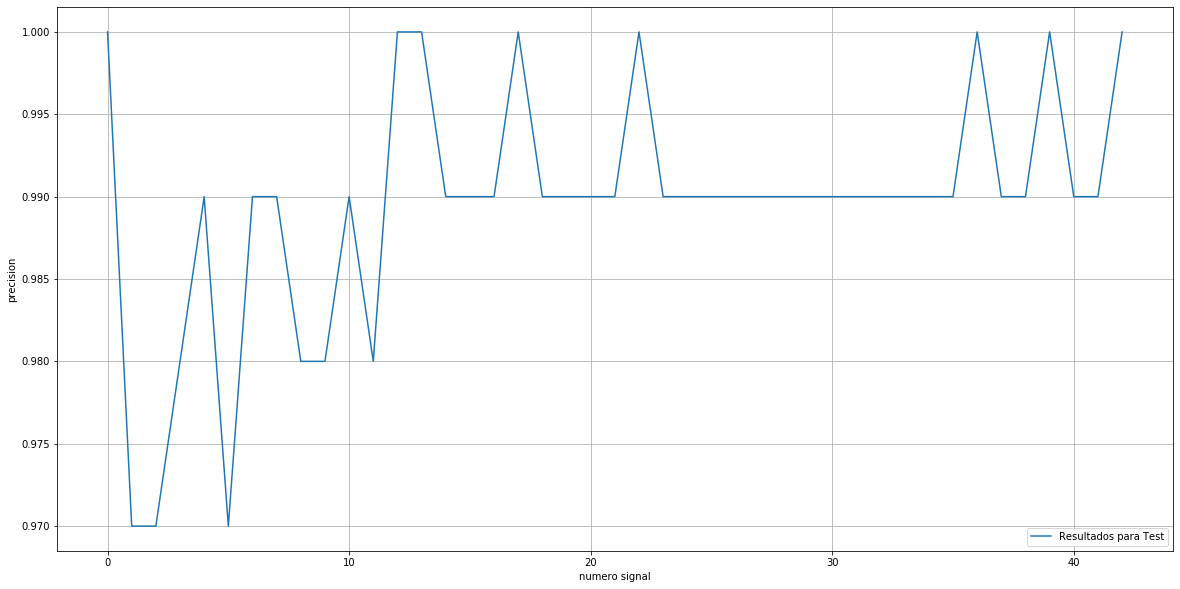

In [75]:
sig = np.arange(len(final_signals))
plt.figure(figsize=(20,10))
#plt.plot(sig,predicctionsTrain,label='Resultados para Train')
plt.plot(sig,predicctionsTest,label='Resultados para Test')
plt.xlabel('numero signal')
plt.ylabel('precision')
plt.grid()
plt.legend(loc=4)
plt.show()

In [76]:
 print(f"La prediccion media de test tiene un acierto del {sum(predicctionsTest)/(len(predicctionsTest))}")

La prediccion media de test tiene un acierto del 0.9895348837209301


In [120]:
def getSignalsLogPredicction(Xtrain,Ytrain,signals_types,carac_type):
        
    predicctionsTrain = []
    final_signals = []
    modelos = []

    for k,s in signals_types.items():
        Ytrain_T = transformarY(Ytrain,s)
        if not(np.any(Ytrain_T==1)):
            predicctionsTrain.append(0)
            final_signals.append(s)
            modelos.append(None)
        else:
            clf = LogisticRegression(random_state=0,solver='lbfgs',max_iter=10000).fit(Xtrain, Ytrain_T)
            prediccionTrain = clf.predict(Xtrain)
    #         print(prediccionTrain.shape)
            scoreTrain = clf.score(Xtrain, Ytrain_T)

    #         print(f"La precision del clasificador en TRAIN: {np.round(scoreTrain,2)} para {s}")

            predicctionsTrain.append((scoreTrain))
            final_signals.append(s)
            modelos.append(clf)
    
#     sig = np.arange(len(final_signals))
#     plt.figure(figsize=(20,10))
#     plt.ylim(0.8, 1)
#     plt.plot(sig,predicctionsTrain,label='Resultados para Train')
#     plt.title(carac_type)
#     plt.xlabel('signals')
#     plt.ylabel('precision')
#     plt.grid()
#     plt.legend(loc=4)
#     plt.show()
    
    predMediaTrain = sum(predicctionsTrain)/len(predicctionsTrain)
    
    print(f'Prediccion media TRAIN: {predMediaTrain}')
    
    return modelos,predMediaTrain,np.array(predicctionsTrain)
    

In [19]:
def deNumeroASignal(num):
    if num<10:
        tipo = '0000'+str(num)
    else:
        tipo = '000'+str(num)
    return tipo

In [121]:
typeDescriptors = ['hog']#['sift','surf','fast_brief','orb','hog']
trafic_signals = crearDiccionarioDatos()
signals_types = devolverDiccionarioEtiquetas()
bestypeDes = None
Modelos = None
bestXtest = None
bestYtrain = None
bestPrediccionTrain = 0
prediccionesPorSignal = None

for carac_type in typeDescriptors:
    
    Xtrain,Ytrain = creaMatrizCaracteristicas(imagenesTrain,carac_type,ytrain)
    
    modelos, prediccionTrain, predicctionsTrain = getSignalsLogPredicction(Xtrain,Ytrain,signals_types,carac_type)
    
    if bestPrediccionTrain < prediccionTrain:
        Modelos = modelos
        bestypeDes = carac_type
        prediccionesPorSignal = predicctionsTrain


['FinDeProhibiciones']
['FinDeProhibiciones']
['FinDeProhibiciones']
['FinDeProhibiciones']
Prediccion media TRAIN: 0.9928249992132681


In [62]:

def probarClasificador(n,Modelos, imagenesTrain,bestypeDes,signals_types):
    cv2.imshow('ventana', imagenesTrain[n])
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    y_imagen = np.zeros(len(Modelos))

    #transformar imagen en des
    d = creaMatrizCaracteristicas(np.array([imagenesTrain[n]]), bestypeDes)
    #print(d.shape)
    d = np.array(d).reshape(1,-1)

    # predecir des
    ii = 0
    for m in Modelos:
        if m is not None:
            y_imagen[ii] = m.predict(d)
            print(y_imagen[ii])
            ii+=1

    #sacar resultado
    pred = np.argwhere(y_imagen==1)
    print(pred)
    if pred.size>1:
        a = deNumeroASignal(pred[np.argmax(prediccionesPorSignal[pred])])
        print('----------')
        print(a)
        print(signals_types[a])
    elif pred.size == 1:
        a = deNumeroASignal(pred[0][0])
        print(signals_types[a])
        

In [105]:
print("--------------------------------------------------------------------------")
n  = (int)(input("Introduce el numero de imagen que quieras clasificar: "))
print(f"Tu imagen a clasificar es la numero {n}")
print("--------------------------------------------------------------------------")

probarClasificador(n,Modelos, imagenesTrain,bestypeDes,signals_types)


--------------------------------------------------------------------------
Introduce el numero de imagen que quieras clasificar: 67
Tu imagen a clasificar es la numero 67
--------------------------------------------------------------------------
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
[[2]]
VelocidadMaxima50


In [31]:
for i in range(43):
    if Modelos[i] is not None:
        print(np.any(Modelos[i].predict(Xtrain)==1))

False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
False
False
True
True
False
True
False
True
True
True
True
True
True
True
False
True
True
False
True
False


In [42]:
Xtest, Ytest = creaMatrizCaracteristicas(imagenesTest,carac_type,ytest)

In [46]:
print(bestypeDes)
ytest = []

for i in range(Xtest.shape[0]):

    y_imagen = np.zeros(len(Modelos))

    #     transformar imagen en des
    d = creaMatrizCaracteristicas(np.array([Xtest[i]]), bestypeDes)
    d = np.array(d).reshape(1,-1)

    #     predecir des
    ii = 0
    for m in Modelos:
        if m is not None:
            y_imagen[ii] = m.predict(d)
            ii+=1

    #     sacar resultado
    pred = np.argwhere(y_imagen==1)
    if pred.size>1:
         ytest.append(signals_types[deNumeroASignal(pred[np.argmax(prediccionesPorSignal[pred])])])
    elif pred.size == 1:
        ytest.append(signals_types[deNumeroASignal(pred[0][0])])
ytest = np.array(ytest).reshape(-1,1)
print(bestYtest.shape,ytest.shape)
np.where(ytest==Ytest).size

hog


ValueError: Found array with 0 feature(s) (shape=(1, 0)) while a minimum of 1 is required.

In [43]:

# probar con el conjunto de test
print(bestypeDes)
ytest = []

for i in range(Xtest.shape[0]):

    y_aux = np.zeros(len(Modelos))
    z = 0
    
    for mod in Modelos:
        y_aux[z] = mod.predict(Xtest[i].reshape(1,-1))
        z+=1
        
    pred = np.argwhere(y_aux==1)
    
    if pred.size>1:
        a = deNumeroASignal(pred[np.argmax(prediccionesPorSignal[pred])])
        print('----------')
        print(a)
        ytest.append(signals_types[a])
    else:
        a = deNumeroASignal(pred)
        print('++++++++++')
        print(a)
        b = signals_types[a]
        print('ttttttttttttttt')
        print(b)
        ytest.append(b)
ytest = np.array(ytest).reshape(-1,1)
print(bestYtest.shape,ytest.shape)
ytest==bestYtest

hog
++++++++++
000[]


C:\Users\alemt\anaconda3\envs\py37vision\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  


KeyError: '000[]'

In [ ]:
def predecirImagen(imagen, Mod,prediccionesPorSignal,carac_type):
    y_imagen = np.zeros(len(Mod))
    
#     transformar imagen en des
    d = creaMatrizCaracteristicas(np.array([imagen]), carac_type)
    print(d.shape)
    d = np.array(d)
    y_d = np.zeros(d.shape[0])
#     predecir des
    ii = 0
    for m in Mod:
        if m is not None:
            for i in range(d.shape[0]):
                y_d[i] = m.predict(d[i].reshape(1,-1))
            print(y_d)
            decision = np.where(y_d==1)[0].size
            if decision >= int(y_d.size/2):
                y_imagen[ii] = 1
            ii+=1
#     sacar resultado
    pred = np.argwhere(y_imagen==1)
    
    if pred.size>1:
        a = deNumeroASignal(pred[np.argmax(prediccionesPorSignal[pred])])
        print('----------')
        print(a)
        return signals_types[a]
    elif pred.size == 1:
        a = deNumeroASignal(pred)
        return signals_types[a]
    else:
        return -1

# 4.SVM

Las máquinas de vectores de soporte o máquinas de vector soporte (del inglés Support Vector Machines, SVM) son un conjunto de algoritmos de aprendizaje supervisado desarrollados por Vladimir Vapnik y su equipo en los laboratorios AT&T.

Estos métodos están propiamente relacionados con problemas de clasificación y regresión. Dado un conjunto de ejemplos de entrenamiento (de muestras) podemos etiquetar las clases y entrenar una SVM para construir un modelo que prediga la clase de una nueva muestra.

$Idea$:

Dado un conjunto de puntos, subconjunto de un conjunto mayor (espacio), en el que cada uno de ellos pertenece a una de dos posibles categorías, un algoritmo basado en SVM construye un modelo capaz de predecir si un punto nuevo (cuya categoría desconocemos) pertenece a una categoría o a la otra.

Como en la mayoría de los métodos de clasificación supervisada, los datos de entrada (los puntos) son vistos como un vector p-dimensional (una lista ordenada de p números).

La SVM busca un hiperplano que separe de forma óptima a los puntos de una clase de la de otra, que eventualmente han podido ser previamente proyectados a un espacio de dimensionalidad superior.

In [150]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},]
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid)
clf.fit(Xtrain, ytrain.ravel())
y_pred = clf.predict(Xtest)
#print("Classification report for - \n{}:\n{}\n".format(clf, metrics.classification_report(ytest.ravel(), y_pred)))

C:\Users\alemt\anaconda3\envs\py37vision\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\alemt\anaconda3\envs\py37vision\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [135]:
ytestCompararSVM = (y_pred)


aciertosSVM =  0
for i in range(len(ytestComparar)):
    if ytestCompararSVM[i] == ytest[i]:
        aciertosSVM+=1
        
porcentajeAciertosSVM = ( aciertosSVM/(len(soluciones)) )*100
print(f"El porcentaje de aciertos es {porcentajeAciertosSVM}")

El porcentaje de aciertos es 83.23809523809523


In [175]:
res = predecirImagenSVM(imagenesTest[11],carac_type,clf)

(288,)


No handles with labels found to put in legend.


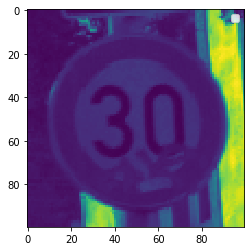

In [184]:
plt.figure()
plt.imshow(imagenesTest[11], label = porcentajeAciertosSVM)
plt.legend()
plt.show()

In [176]:
res

array(['VelocidadMaxima30'], dtype='<U39')

In [159]:
def predecirImagenSVM(imagen,carac_type,clf):
    
#     transformar imagen en des
    d = creaMatrizCaracteristicas(np.array([imagen]), carac_type)
    print(d.shape)
    d = np.array(d).reshape(1,-1)
    return clf.predict(d)